Realizar pronósticos sobre la disminución de usuarios en el sector de las telecomunicaciones.
-

Estamos colaborando con Interconnect, un proveedor de servicios de telecomunicaciones, que busca anticiparse a la pérdida de clientes. Si identificamos que un cliente tiene la intención de cancelar su suscripción, se le ofrecerán códigos promocionales y opciones de planes especiales. El departamento de marketing de Interconnect nos ha brindado acceso a ciertos datos personales de sus clientes, que incluyen información sobre sus planes y contratos. Nuestra tarea consiste en analizar los datos y desarrollar un modelo que pueda predecir si un cliente decidirá permanecer o abandonar el servicio, basándonos en la información proporcionada.

# Tabla de Contenidos
1. [Informacion General](#step1)
2. [Extracción de datos](#step2)
3. [Prepocesamiento de Datos](#step3)
4. [Análisis](#step4)
5. [Entrenamiento del Modelo](#step5)
6. [Models](#step6)
7. [Prueba Final](#step7)
8. [Conclusión](#step8)

# Informacion General<a name='step1'></a>

In [94]:
#General
import pandas as pd
import numpy as np

#Graficos
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn library - machine learning
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Gradient boosting
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

Cargaremos los Datos

# Extracción de datos<a name='step2'></a>

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

In [95]:
try:
    contract=pd.read_csv('C:/Users/Luis Quevedo/Documents/proyectos/proyecto 16 FINAL/contract.csv')
    personal=pd.read_csv('C:/Users/Luis Quevedo/Documents/proyectos/proyecto 16 FINAL/personal.csv')
    internet=pd.read_csv('C:/Users/Luis Quevedo/Documents/proyectos/proyecto 16 FINAL/internet.csv')
    phone=pd.read_csv('C:/Users/Luis Quevedo/Documents/proyectos/proyecto 16 FINAL/phone.csv')

except:
    contract=pd.read_csv('/datasets/final_provider/contract.csv')
    personal=pd.read_csv('/datasets/final_provider/personal.csv')
    internet=pd.read_csv('/datasets/final_provider/internet.csv')
    phone=pd.read_csv('/datasets/final_provider/phone.csv')

In [96]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [97]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


La columna **"BeginDate"** y **"EndDate"** deben ser convertidas a tipo datetime. La columna **"customerid"** puede permanecer como asi como se encuentra. La columna **"Type"**, **"PaperlessBilling"** y **"PaymentMethod"** deben ser de tipo category. Y por ultimo la columna **"TotalCharges"** puede cambiarse a flotante.

In [98]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [99]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Aparte de customerid, todas las columnas deben cambiarse al tipo categórico

In [100]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [101]:
internet.columns = internet.columns.str.lower()
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerid        5517 non-null   object
 1   internetservice   5517 non-null   object
 2   onlinesecurity    5517 non-null   object
 3   onlinebackup      5517 non-null   object
 4   deviceprotection  5517 non-null   object
 5   techsupport       5517 non-null   object
 6   streamingtv       5517 non-null   object
 7   streamingmovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


Excepto por el identificador del cliente (**"customerid"**), todas las demás columnas deben ser tratadas como categorícas. Además, se observa que esta columna tiene menos filas, lo que indica que no todos los clientes están suscritos al servicio de Internet.

In [102]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [103]:
phone.columns = phone.columns.str.lower()
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     6361 non-null   object
 1   multiplelines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


La columna **"MultipleLines"** debe hacerse booleana ya que revisando la columna nos muestra solo dos valores eso nos indica que podemos inclinarnos por convertirla a tipo: bool 

Hemos revisado las tablas en detalle y es necesario realizar algunos ajustes en su procesamiento antes de fusionarlas en un punto determinado. Sin embargo, al fusionarlas, es inevitable que se generen valores faltantes debido a que las tablas no tienen la misma cantidad de filas. Además, tendremos que abordar el tratamiento de los valores faltantes de manera adecuada.

# Prepocesamiento de Datos<a name='step3'></a>

Comenzaremos por analizar el datasets contract y convertiremos la columna **"TotalCharges"** al tipo de dato float. A su vez, cambiaremos las columnas pertinentes al tipo de dato categórico. Al examinar la columna **"EndDate"**, notamos que algunas filas contienen el valor 'No' (indicando que el cliente no se ha dado de baja). Utilizaremos esta información para crear una nueva columna llamada **"churn"**, que tomará el valor 0 cuando el cliente permanezca y 1 cuando se haya dado de baja. Esta nueva columna se convertirá en nuestro objetivo principal.

In [104]:
#Datasets Contract
contract['Type']=contract['Type'].astype('category')
contract['PaperlessBilling']=contract['PaperlessBilling'].astype('category')
contract['PaymentMethod']=contract['PaymentMethod'].astype('category')
contract['TotalCharges']=pd.to_numeric(contract['TotalCharges'], errors='coerce')
contract['churn'] = (contract['EndDate'] != "No").astype("int")

In [105]:
# checar duplicados
contract.duplicated().sum()

0

Además, tenemos la opción de crear una columna llamada "days" que calculará la diferencia entre la fecha de finalización (EndDate) y la fecha de inicio (BeginDate). En este punto, ambas columnas siguen siendo de tipo objeto. Para proceder, reemplazaremos cada instancia de 'No' en la columna EndDate por el 1 de febrero de 2020, que representa la fecha en que se recopilaron los datos, y se introducirá en el formato existente en la columna (2020-02-01 00:00:00). Esto permitirá luego cambiar la columna a tipo datetime. Posteriormente, podremos calcular la diferencia entre ambas fechas y almacenarla en la columna 'days'.

In [106]:
contract['EndDate']=contract['EndDate'].replace('No','2020-02-01 00:00:00')
contract['BeginDate']=pd.to_datetime(contract['BeginDate'], format='%Y-%m-%d')
contract['EndDate']=pd.to_datetime(contract['EndDate'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   category      
 4   PaperlessBilling  7043 non-null   category      
 5   PaymentMethod     7043 non-null   category      
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   churn             7043 non-null   int32         
dtypes: category(3), datetime64[ns](2), float64(2), int32(1), object(1)
memory usage: 323.8+ KB


In [107]:
contract['days']=(contract['EndDate'] - contract['BeginDate']).dt.days
contract['days'].unique()

array([  31, 1036,   61, 1371,  245,  671,  306,  853, 1888,  396,  488,
       1767, 1491,  761, 2102, 1584, 2163,  304,  641,   30,  365, 1492,
        914, 1431, 2191,  518,   62,  822,  153, 1401, 1033,  335, 2132,
       1918, 1310,  456, 1826,  549, 2010, 1432,  275,   92,  945, 1523,
       1949, 1706,  337,  214, 1279,  276, 1067, 1461,  883, 1979, 1157,
       2071,  975, 1675, 1126, 1095,  303, 1248,  184,   91,  215,  123,
       1006, 2041,  702, 1737,  242, 1857,  457,  427,  610, 1614,  395,
       1218, 1798,  730, 1340,  579,  122, 1645, 1553,  580, 1795,  487,
       1583,  548,  974, 1156, 1309, 1917,  640,  760,  334, 2101,  669,
       1676, 1856,  792,  852,    0, 1217,  699, 1186, 1065, 1703,  273,
        607, 1003, 1369,  609, 1005, 1399, 1887, 1187, 1765, 2129,  638,
       1522,  183, 1064, 1338, 2160,  972,  244,  791,  426, 1125, 1796,
       2130, 1034, 1430,  913, 2040, 1278, 1400, 2009,  944, 1734, 2099,
       1764,  700,  668, 1736, 1370, 1644, 2070,  8

In [108]:
contract.columns = contract.columns.str.lower()
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           7043 non-null   datetime64[ns]
 3   type              7043 non-null   category      
 4   paperlessbilling  7043 non-null   category      
 5   paymentmethod     7043 non-null   category      
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7032 non-null   float64       
 8   churn             7043 non-null   int32         
 9   days              7043 non-null   int64         
dtypes: category(3), datetime64[ns](2), float64(2), int32(1), int64(1), object(1)
memory usage: 378.9+ KB


In [109]:
# Check rows with NaN
values_nan = contract.query('totalcharges.isna()')
values_nan

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,days
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN,0,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN,0,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN,0,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,NaN,0,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,NaN,0,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,NaN,0,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,NaN,0,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,NaN,0,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,NaN,0,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,NaN,0,0


In [110]:
# Check "begin_date"	

print(f'Oldest date {contract.begindate.min()}')
print(f'Newest date {contract.begindate.max()}')

Oldest date 2013-10-01 00:00:00
Newest date 2020-02-01 00:00:00


In [111]:
# Fill values NaN with monthly_charges
contract['totalcharges'] = contract['totalcharges'].fillna(contract['monthlycharges'])

In [112]:
# Check again without NaN
print(f'NaN {contract.totalcharges.isna().sum()}')

NaN 0


Avanzamos hacia la sección de Información personal. Con la excepción de customerid, convertiremos las demás columnas al tipo **"category"**.

In [113]:
#datasets personal
personal['gender'] = personal['gender'].astype('category')
personal['Partner'] = personal['Partner'].astype('category')
personal['Dependents'] = personal['Dependents'].astype('category')
personal['SeniorCitizen'] = personal['SeniorCitizen'].astype('category')

In [114]:
personal.columns = personal.columns.str.lower()
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   customerid     7043 non-null   object  
 1   gender         7043 non-null   category
 2   seniorcitizen  7043 non-null   category
 3   partner        7043 non-null   category
 4   dependents     7043 non-null   category
dtypes: category(4), object(1)
memory usage: 83.1+ KB


No abordaremos la conversión de las columnas de las otras tablas a tipo categórico por el momento, ya que esto generaría valores NaN que deberíamos reemplazar con un valor. Por lo tanto, procederemos directamente con la fusión de las tablas en la columna customerid. Comenzaremos fusionando la tabla contract con las tablas de información personal.

In [115]:
#Merging of datasets personal-contract
merge_first=pd.merge(personal, contract, how="left", on="customerid")
merge_first.head()

,customerid,gender,seniorcitizen,partner,dependents,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,days
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,31
1,5575-GNVDE,Male,0,No,No,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0,1036
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,61
3,7795-CFOCW,Male,0,No,No,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,61


In [116]:
merge_first.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
begindate           0
enddate             0
type                0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
days                0
dtype: int64

podemos ver que tenemos un numero muy minimo de valores ausentes asi que no nos afecta al proceso

In [117]:
merge_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   gender            7043 non-null   category      
 2   seniorcitizen     7043 non-null   category      
 3   partner           7043 non-null   category      
 4   dependents        7043 non-null   category      
 5   begindate         7043 non-null   datetime64[ns]
 6   enddate           7043 non-null   datetime64[ns]
 7   type              7043 non-null   category      
 8   paperlessbilling  7043 non-null   category      
 9   paymentmethod     7043 non-null   category      
 10  monthlycharges    7043 non-null   float64       
 11  totalcharges      7043 non-null   float64       
 12  churn             7043 non-null   int32         
 13  days              7043 non-null   int64         
dtypes: category(7), datetime

Segundo merge con el datasets, información de suscripción telefónica

In [118]:
merge_second=pd.merge(merge_first, phone, how="left", on="customerid")
merge_second.head()

,customerid,gender,seniorcitizen,partner,dependents,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,days,multiplelines
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,31,NaN
1,5575-GNVDE,Male,0,No,No,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0,1036,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371,NaN
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,61,No


Tercer Merge. informacion de suscripcion de internet

In [119]:
data_third=pd.merge(merge_second, internet, how="left", on="customerid")
data_third.head()

,customerid,gender,seniorcitizen,partner,dependents,begindate,enddate,type,paperlessbilling,paymentmethod,...,churn,days,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,...,0,31,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,2017-04-01,2020-02-01,One year,No,Mailed check,...,0,1036,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,...,1,61,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),...,0,1371,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,...,1,61,No,Fiber optic,No,No,No,No,No,No


In [120]:
data_third.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   gender            7043 non-null   category      
 2   seniorcitizen     7043 non-null   category      
 3   partner           7043 non-null   category      
 4   dependents        7043 non-null   category      
 5   begindate         7043 non-null   datetime64[ns]
 6   enddate           7043 non-null   datetime64[ns]
 7   type              7043 non-null   category      
 8   paperlessbilling  7043 non-null   category      
 9   paymentmethod     7043 non-null   category      
 10  monthlycharges    7043 non-null   float64       
 11  totalcharges      7043 non-null   float64       
 12  churn             7043 non-null   int32         
 13  days              7043 non-null   int64         
 14  multiplelines     6361 n

En este momento, tenemos la capacidad de reemplazar los valores ausentes. Dado que los usuarios cuyas filas contienen valores faltantes no se inscriben en el servicio correspondiente a esas columnas, podemos suplir dichos valores ausentes con la palabra "No".

In [121]:
#Reemplazar los valores que faltan con la palabra "No"
str_cols = data_third.columns[data_third.dtypes=='object']
data_third[str_cols] = data_third[str_cols].fillna('No')

In [122]:
data_third.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   gender            7043 non-null   category      
 2   seniorcitizen     7043 non-null   category      
 3   partner           7043 non-null   category      
 4   dependents        7043 non-null   category      
 5   begindate         7043 non-null   datetime64[ns]
 6   enddate           7043 non-null   datetime64[ns]
 7   type              7043 non-null   category      
 8   paperlessbilling  7043 non-null   category      
 9   paymentmethod     7043 non-null   category      
 10  monthlycharges    7043 non-null   float64       
 11  totalcharges      7043 non-null   float64       
 12  churn             7043 non-null   int32         
 13  days              7043 non-null   int64         
 14  multiplelines     7043 n

Ahora tenemos la capacidad de llevar a cabo nuestras transformaciones de categorías de tipo.

In [123]:
#converting to categorical columns
data_third['onlinesecurity'] = (data_third['onlinesecurity'] == "Yes").astype("category")
data_third['onlinebackup'] = (data_third['onlinebackup'] == "Yes").astype("category")
data_third['techsupport'] = (data_third['techsupport'] == "Yes").astype("category")
data_third['deviceprotection'] = (data_third['deviceprotection'] == "Yes").astype("category")
data_third['streamingtv'] = (data_third['streamingtv'] == "Yes").astype("category")
data_third['streamingmovies'] = (data_third['streamingmovies'] == "Yes").astype("category")
data_third['internetservice'] = data_third['internetservice'].astype('category')
data_third['multiplelines'] = (data_third['multiplelines'] == "Yes").astype("category")

In [124]:
data_third.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   gender            7043 non-null   category      
 2   seniorcitizen     7043 non-null   category      
 3   partner           7043 non-null   category      
 4   dependents        7043 non-null   category      
 5   begindate         7043 non-null   datetime64[ns]
 6   enddate           7043 non-null   datetime64[ns]
 7   type              7043 non-null   category      
 8   paperlessbilling  7043 non-null   category      
 9   paymentmethod     7043 non-null   category      
 10  monthlycharges    7043 non-null   float64       
 11  totalcharges      7043 non-null   float64       
 12  churn             7043 non-null   int32         
 13  days              7043 non-null   int64         
 14  multiplelines     7043 n

Hemos completado el preprocesamiento de nuestros datos. Ahora podemos avanzar hacia el análisis exploratorio de los datos.

# Análisis<a name='step4'></a>

- **Desequilibrio de clases**

Vamos a investigar la disparidad en la distribución de clases dentro de nuestro conjunto de datos, específicamente enfocándonos en aquellos que se marcharon en comparación con aquellos que se quedaron.

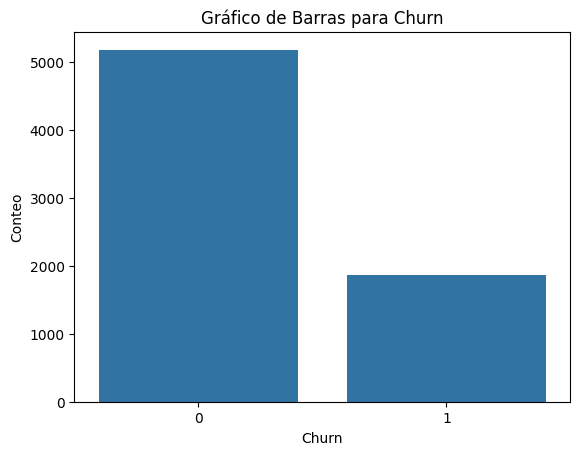

In [125]:
# Calcular el conteo de cada categoría en la columna 'churn'
conteo_churn = data_third['churn'].value_counts()

# Convertir el conteo en un DataFrame
df_churn = conteo_churn.reset_index()
df_churn.columns = ['Churn', 'Conteo']

# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='Churn', y='Conteo', data=df_churn)

# Personalizar el gráfico
plt.xlabel('Churn')
plt.ylabel('Conteo')
plt.title('Gráfico de Barras para Churn')
plt.show()


Podemos Observar que mas de 5000 personas permanecieron donde en el grafico de barras 0 es la columna azul en el grafico de barras de los que permanecieron y por otro lado vemos poco menos de 2000 se marcharon de lado de la columna amarilla identificandola con el numero 1.

- **Features vs Churn**

Realizaremos representaciones gráficas para visualizar la distribución del churn en relación a las otras características.

In [126]:
data_third.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   gender            7043 non-null   category      
 2   seniorcitizen     7043 non-null   category      
 3   partner           7043 non-null   category      
 4   dependents        7043 non-null   category      
 5   begindate         7043 non-null   datetime64[ns]
 6   enddate           7043 non-null   datetime64[ns]
 7   type              7043 non-null   category      
 8   paperlessbilling  7043 non-null   category      
 9   paymentmethod     7043 non-null   category      
 10  monthlycharges    7043 non-null   float64       
 11  totalcharges      7043 non-null   float64       
 12  churn             7043 non-null   int32         
 13  days              7043 non-null   int64         
 14  multiplelines     7043 n

In [127]:
# Lista de columnas a excluir
columnas_excluir = ["days", "begindate"]

# Utilizar el método drop para eliminar las columnas especificadas
data_slice = data_third.drop(columns=columnas_excluir)

#crearemos una columna month of stay
data_third['month_of_stay'] = data_third.apply(lambda x: ((data_third['begindate'].max() - x['begindate']).days / 30.44) if x['enddate'] == "No" 
                                            else ((pd.to_datetime(x['enddate']) - x['begindate']).days / 30.44), axis=1).astype(int)

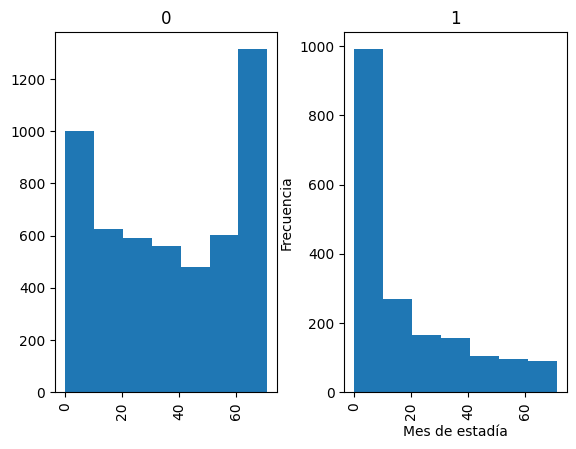

In [128]:
data_third.hist(column= 'month_of_stay', by='churn', bins=7)
plt.xlabel('Mes de estadía')
plt.ylabel('Frecuencia')
plt.show()


podemos notar un incremento significativo en el grafico de la izquierda haciendo referencia los usuarios que tienden a permanecer mas tiempo en el servicio durante esos meses churn:0 en comparacion al grafico de la derecha donde podemos observar un decremento con un sesgo hacia la izquierda de los clientes que abandonaron en esos meses el servicio.

In [129]:
data_third.head()

,customerid,gender,seniorcitizen,partner,dependents,begindate,enddate,type,paperlessbilling,paymentmethod,...,days,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,month_of_stay
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,...,31,False,DSL,False,True,False,False,False,False,1
1,5575-GNVDE,Male,0,No,No,2017-04-01,2020-02-01,One year,No,Mailed check,...,1036,False,DSL,True,False,True,False,False,False,34
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,...,61,False,DSL,True,True,False,False,False,False,2
3,7795-CFOCW,Male,0,No,No,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),...,1371,False,DSL,True,False,True,True,False,False,45
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,...,61,False,Fiber optic,False,False,False,False,False,False,2


C:\Users\Luis Quevedo\AppData\Local\Temp\ipykernel_7296\3237860758.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = data_slice.groupby([col, 'churn'])['churn'].count().unstack()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Luis Quevedo\AppData\Local\Temp\ipykernel_7296\3237860758.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = data_slice.groupby([col, 'churn'])['churn'].count().unstack()
No artists with labels found to put in legend.  Note that artists whose label start w

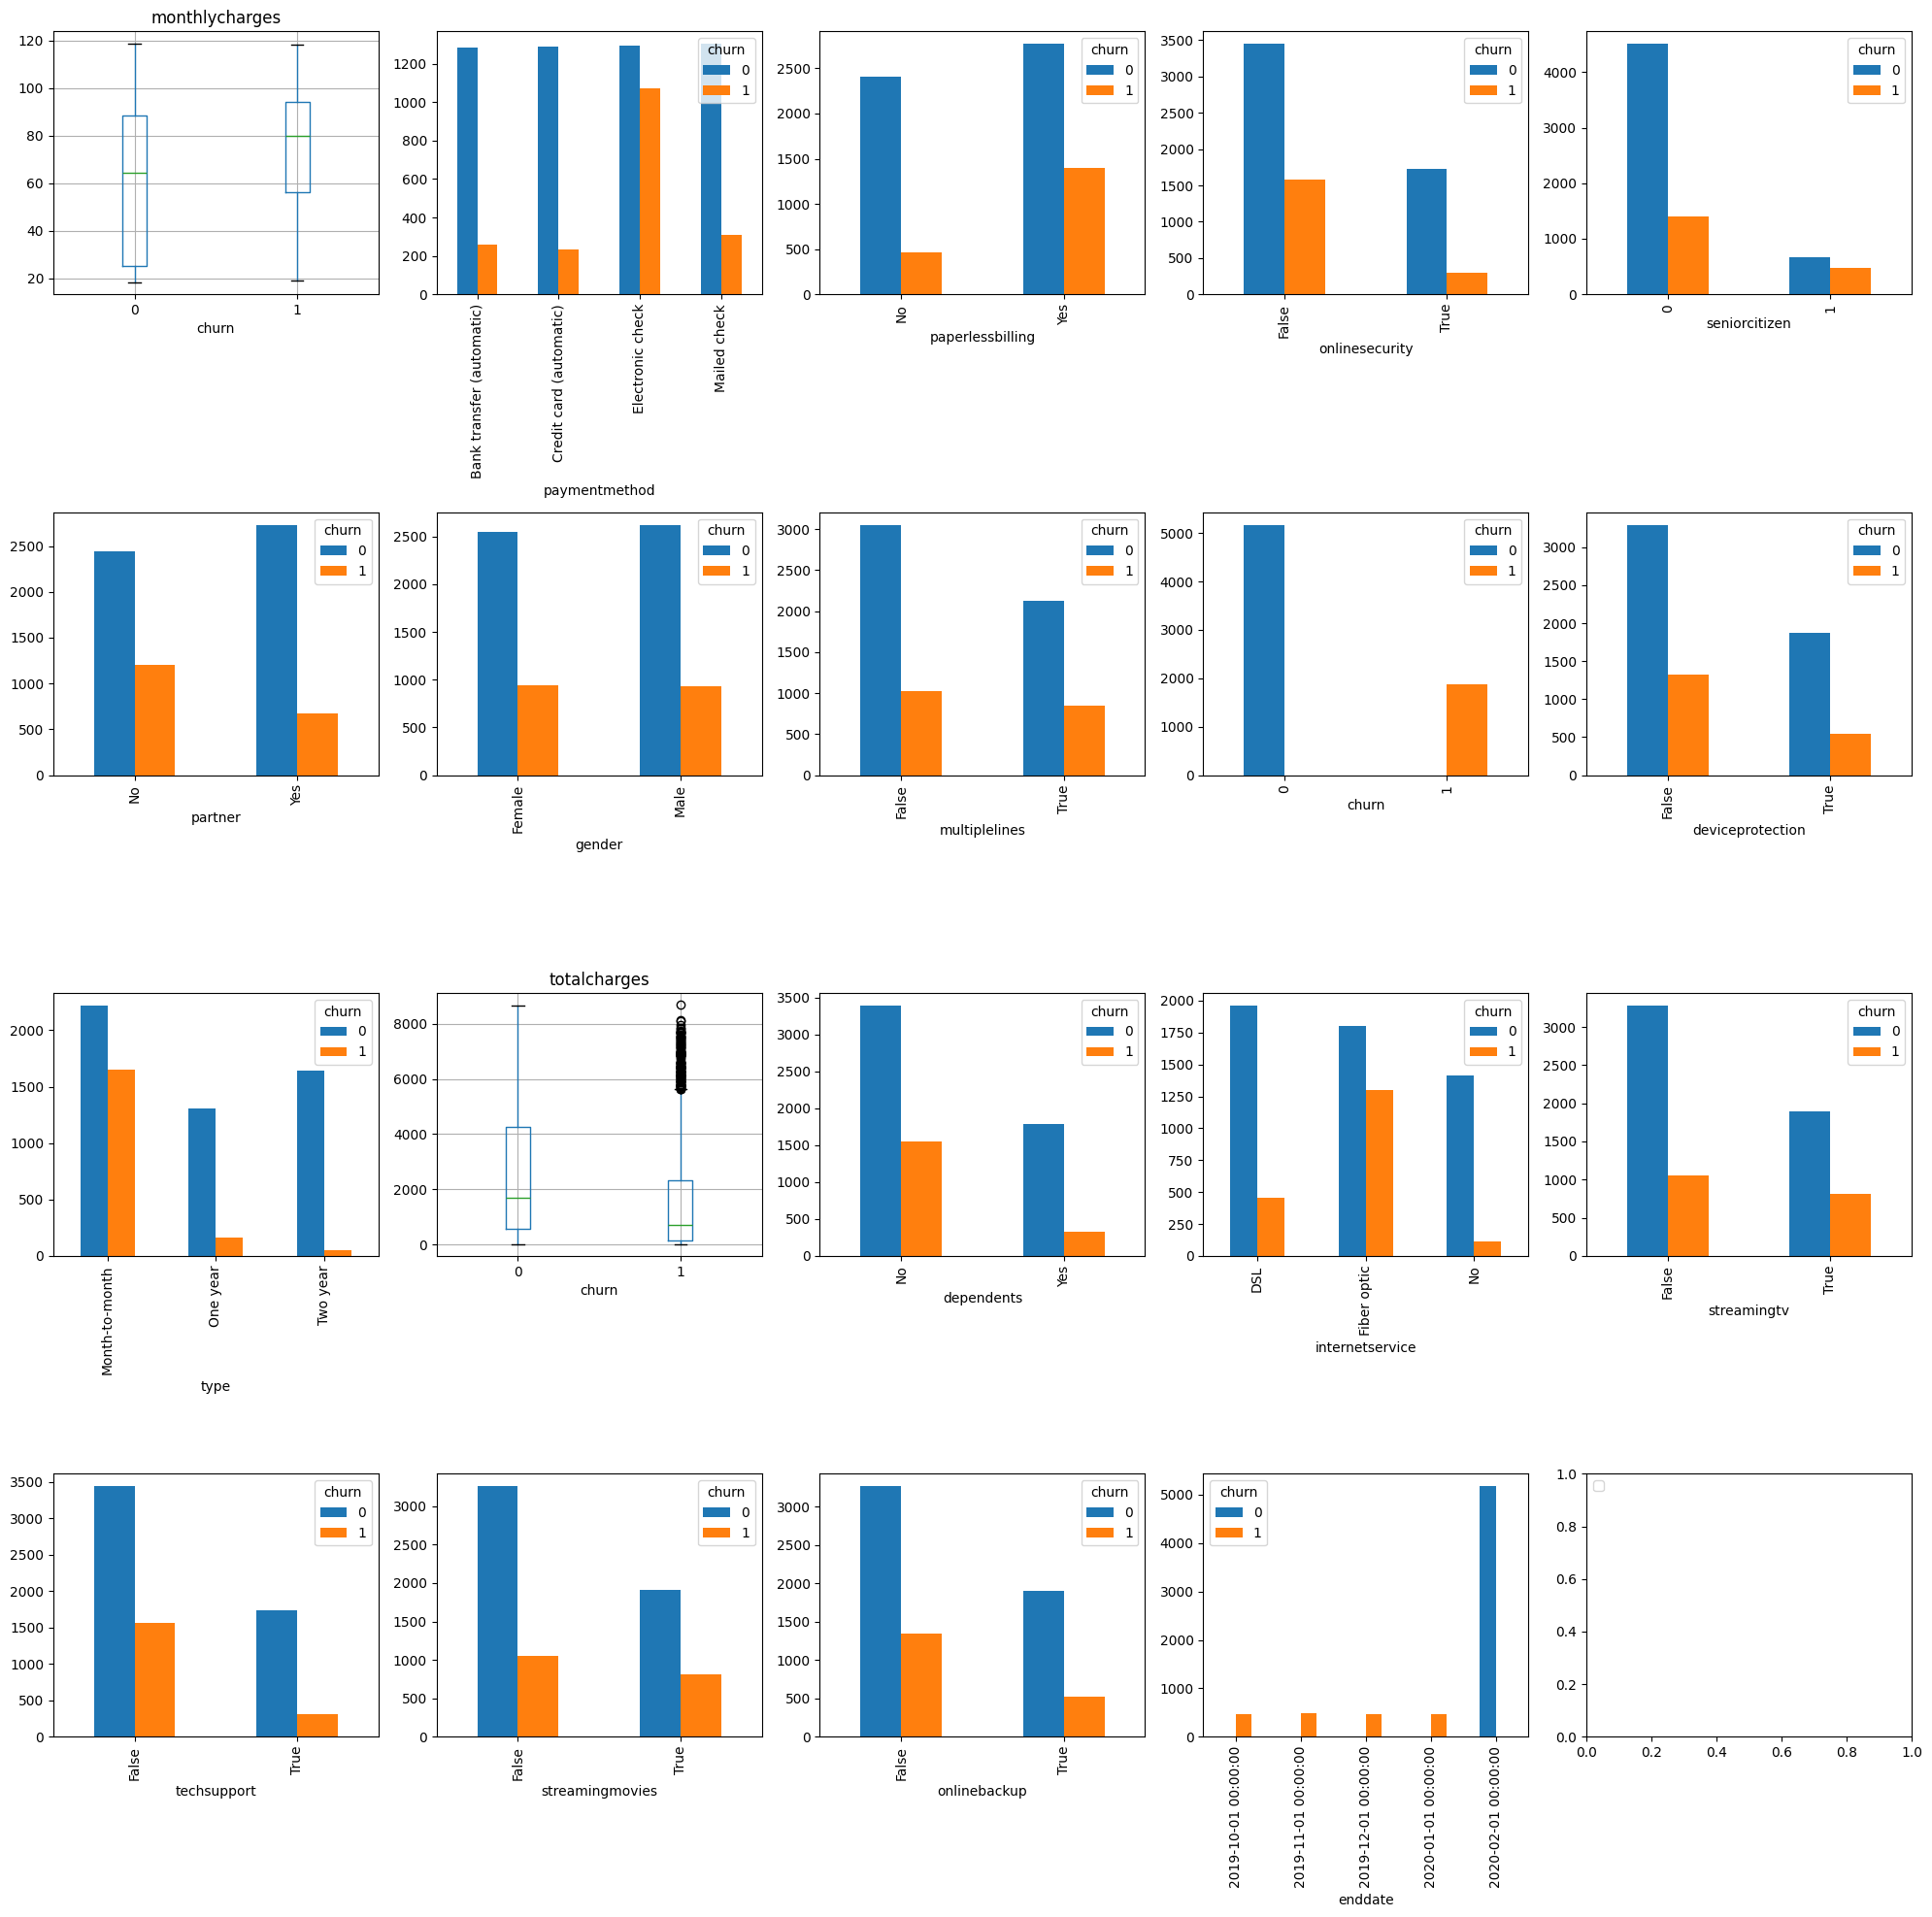

In [130]:
#Planificar gráficos con características frente al churn. Boxplots para características discretas, gráficos de barras para valores categóricos.
fig, axs = plt.subplots(4, len(data_slice.columns) // 4, figsize=(20,20))
axs = axs.flatten()
cols=list(set(data_slice.columns) - set(['customerid']))
for col, ax in zip(cols, axs):
    if data_slice[col].dtype=='float64':
        data_slice.boxplot(column=col, by='churn', ax=ax)
        plt.suptitle('')
    else:
        df = data_slice.groupby([col, 'churn'])['churn'].count().unstack()
        df.plot(kind='bar', stacked=False, label='#churn (neg, pos)', ax=ax)
        plt.legend(loc='upper left')
    
plt.tight_layout()
plt.show()    

Lo que podemos inferir es que la mayoría de las personas que abandonaron el servicio cumplen con las siguientes características:

- Optaron por la facturación electrónica en lugar de recibir facturas impresas, especialmente a través de cheques electrónicos.
- No pertenecían al grupo de personas mayores.
- No utilizaban uno o varios de los servicios del abono a través de Internet.
- Realizaban pagos mensuales.
- Estos usuarios generalmente tenían cuotas mensuales más altas (alrededor de un promedio de 80 USD), según la información del diagrama de caja en relación a los "días" (con algunos valores atípicos).
- También pagaban menos en total, ya que no solían mantenerse en el servicio durante mucho tiempo (aunque hay un número significativo de valores atípicos).

- **Correlation Matrix**

 Let us take a look at the correlation matrix

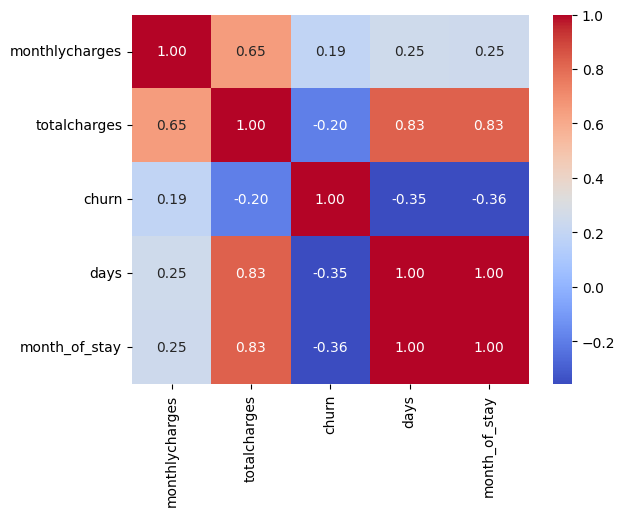

In [135]:
# Seleccionar columnas numéricas
numeric_columns = ['monthlycharges', 'totalcharges', 'churn', 'days', 'month_of_stay']

# Calcular la matriz de correlación
correlation_matrix = data_third[numeric_columns].corr()

# Crear un heatmap de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Mostrar el gráfico
plt.show()


En este heatmap, las celdas más oscuras indican una correlación más fuerte.

---

- Un gráfico de pares permite visualizar las relaciones bivariadas entre las variables numéricas. Cada punto en el gráfico representa una observación y las relaciones se visualizan mediante dispersión.

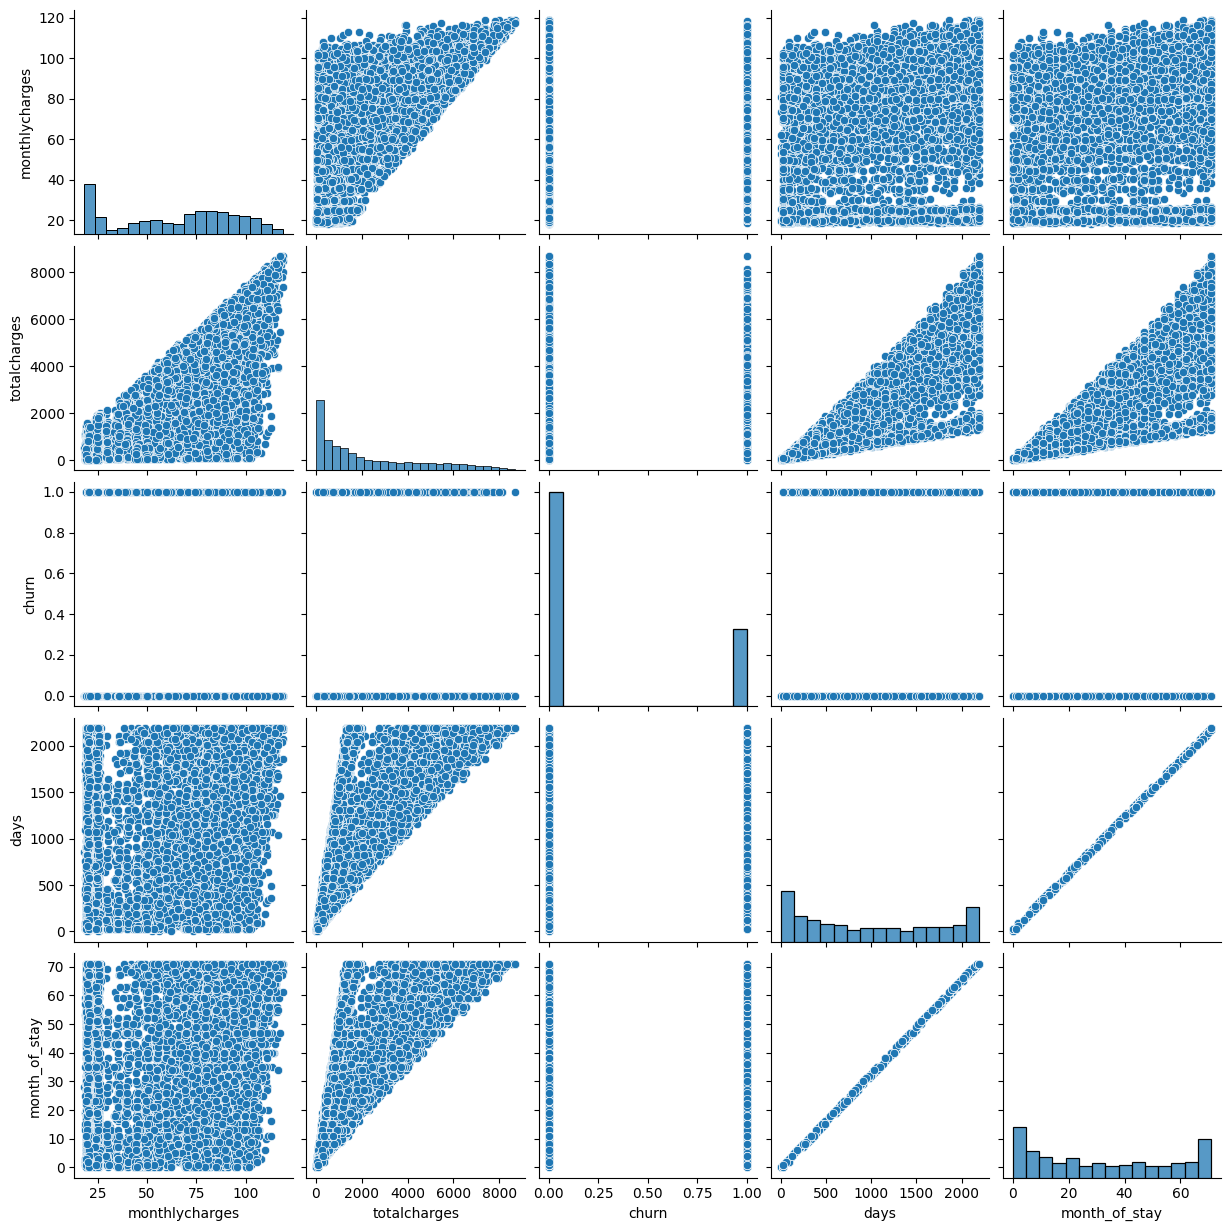

In [136]:
sns.pairplot(data_third[numeric_columns])
plt.show()

Este gráfico de pares proporciona una visión más detallada de cómo las variables numéricas se relacionan entre sí.

In [137]:
from scipy.stats import pearsonr

# Ejemplo para calcular la correlación entre 'monthlycharges' y 'totalcharges'
corr, p_value = pearsonr(data_third['monthlycharges'], data_third['totalcharges'])
print(f"Correlación: {corr}, p-value: {p_value}")


Correlación: 0.6511819850393796, p-value: 0.0


La correlación entre monthlycharges y totalcharges es de aproximadamente 0.65, lo cual indica una correlación positiva significativa entre estas dos variables. El p-value es muy cercano a cero (0.0), lo que sugiere que esta correlación no es producto del azar y es estadísticamente significativa.

In [41]:
data_third.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   gender            7043 non-null   category      
 2   seniorcitizen     7043 non-null   category      
 3   partner           7043 non-null   category      
 4   dependents        7043 non-null   category      
 5   begindate         7043 non-null   datetime64[ns]
 6   enddate           7043 non-null   datetime64[ns]
 7   type              7043 non-null   category      
 8   paperlessbilling  7043 non-null   category      
 9   paymentmethod     7043 non-null   category      
 10  monthlycharges    7043 non-null   float64       
 11  totalcharges      7043 non-null   float64       
 12  churn             7043 non-null   int32         
 13  days              7043 non-null   int64         
 14  multiplelines     7043 n

Ninguna de las características numéricas muestra una correlación significativa con la tasa de churn. Sin embargo, se destaca una fuerte correlación entre el número de días y los gastos totales pagados

En el siguiente análisis, estudiaremos las tarifas mensuales de los suscriptores de servicios de teléfono e Internet, y compararemos la distribución de cada servicio entre aquellos que cancelaron y aquellos que no lo hicieron

- **Cargos mensuales de los abonados al servicio telefónico**

In [42]:
phone_users=data_third[data_third['customerid'].isin(phone['customerid'])]
phone_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6361 entries, 1 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        6361 non-null   object        
 1   gender            6361 non-null   category      
 2   seniorcitizen     6361 non-null   category      
 3   partner           6361 non-null   category      
 4   dependents        6361 non-null   category      
 5   begindate         6361 non-null   datetime64[ns]
 6   enddate           6361 non-null   datetime64[ns]
 7   type              6361 non-null   category      
 8   paperlessbilling  6361 non-null   category      
 9   paymentmethod     6361 non-null   category      
 10  monthlycharges    6361 non-null   float64       
 11  totalcharges      6361 non-null   float64       
 12  churn             6361 non-null   int32         
 13  days              6361 non-null   int64         
 14  multiplelines     6361 non-nu

Distribución de las tarifas mensuales entre los usuarios de teléfono

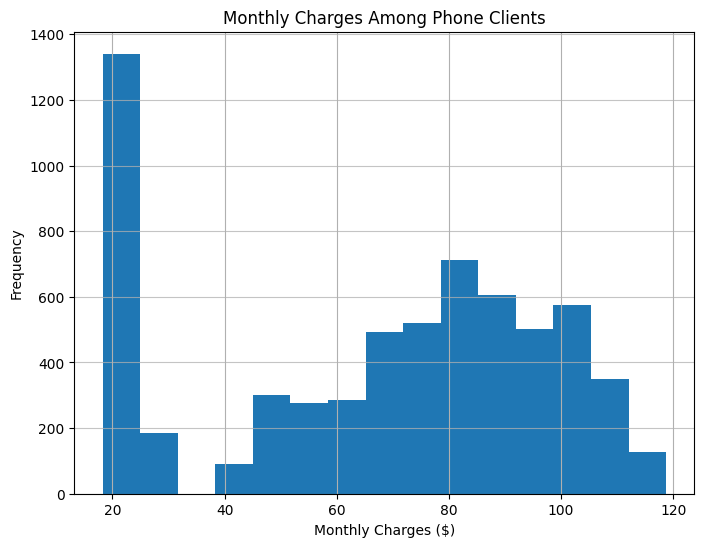

In [43]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

phone_users['monthlycharges'].hist(bins=15, ax=ax)
ax.set_xlabel('Monthly Charges ($)')
ax.set_ylabel('Frequency')
ax.set_title('Monthly Charges Among Phone Clients')
ax.grid(axis='y', alpha=0.75)

plt.show()

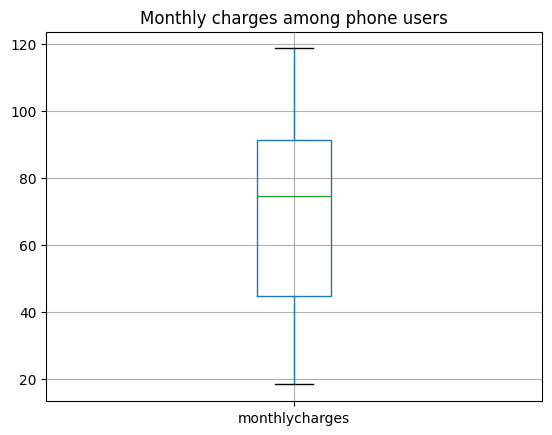

In [44]:
phone_users.boxplot(column='monthlycharges')
plt.title('Monthly charges among phone users')
plt.show()

In [45]:
phone_users['monthlycharges'].describe()

count    6361.000000
mean       67.199041
std        30.449604
min        18.250000
25%        44.750000
50%        74.700000
75%        91.250000
max       118.750000
Name: monthlycharges, dtype: float64

En general, un usuario promedio de teléfono tiene una tarifa mensual que oscila entre aproximadamente 45 (percentil 25) y 91 (percentil 75). Sin embargo, según el histograma, se observa un considerable número de personas (alrededor de 1,500) que pagan mensualmente entre 20 y 30 unidades. A continuación, procedamos a analizar la distribución de tarifas entre aquellos que decidieron cancelar el servicio y aquellos que optaron por permanecer.

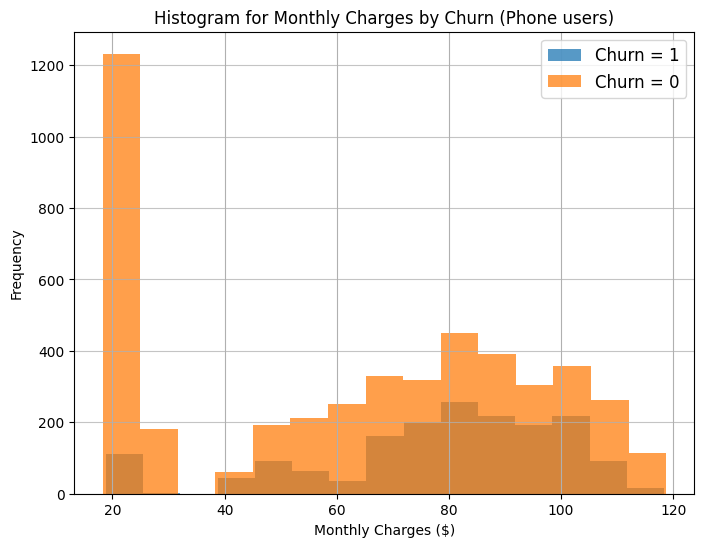

In [46]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

phone_users[phone_users['churn'] == 1]['monthlycharges'].hist(bins=15, alpha=0.75, label='Churn = 1', ax=ax)
phone_users[phone_users['churn'] == 0]['monthlycharges'].hist(bins=15, alpha=0.75, label='Churn = 0', ax=ax)
ax.grid(axis='y', alpha=0.75)
ax.legend(loc='best', fontsize=12)
ax.set_xlabel('Monthly Charges ($)')
ax.set_ylabel('Frequency')
ax.set_title('Histogram for Monthly Charges by Churn (Phone users)')

plt.show()

Las distribuciones son bastante parecidas, aunque la de los clientes que se marcharon es significativamente más baja

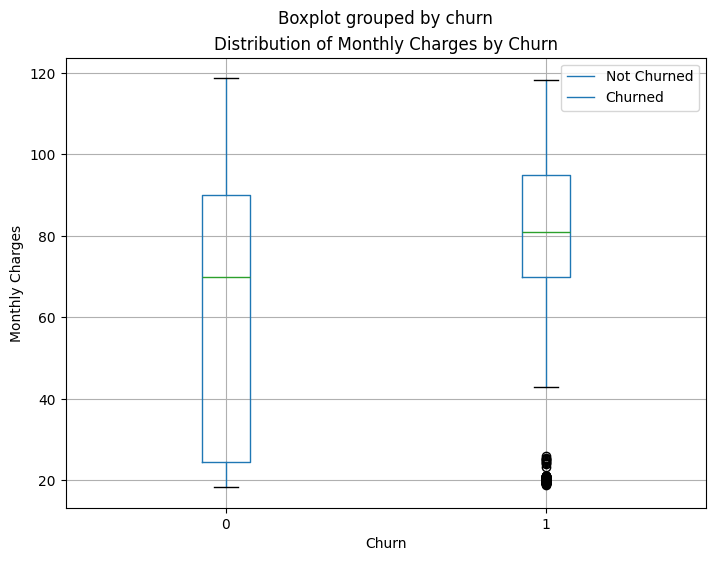

In [47]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

phone_users.boxplot(column='monthlycharges', by='churn', ax=ax)
ax.set_xlabel('Churn')
ax.set_ylabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')
ax.legend(['Not Churned', 'Churned'])

plt.show()


Aquellos que decidieron cancelar su servicio tuvieron cuotas mensuales más elevadas en comparación con aquellos que optaron por permanecer.

In [48]:
print('Monthly Charge distribution for those who left', phone_users[phone_users['churn']==1]['monthlycharges'].describe())

Monthly Charge distribution for those who left count    1699.000000
mean       78.134255
std        22.567643
min        18.850000
25%        69.975000
50%        80.950000
75%        94.850000
max       118.350000
Name: monthlycharges, dtype: float64


In [49]:
print('Monthly Charge distribution for those who stayed', phone_users[phone_users['churn']==0]['monthlycharges'].describe())

Monthly Charge distribution for those who stayed count    4662.000000
mean       63.213857
std        31.939591
min        18.250000
25%        24.500000
50%        69.850000
75%        90.050000
max       118.750000
Name: monthlycharges, dtype: float64


Aquellos que decidieron abandonar el servicio solían pagar cantidades que oscilaban entre 70 (percentil 25) y 95 (percentil 75). En cambio, los que optaron por permanecer pagaban montos que variaban entre 24 (percentil 25) y 90 (percentil 75).

In [50]:
# Separar los datos en dos grupos basados en "churn" (0: no cancelado, 1: cancelado)
data_churn_0 = phone_users[phone_users['churn'] == 0]['monthlycharges']
data_churn_1 = phone_users[phone_users['churn'] == 1]['monthlycharges']


In [51]:
from scipy.stats import ttest_ind

# Realizar la prueba t de Student
t_statistic, p_value = ttest_ind(data_churn_0, data_churn_1)

# Imprimir el resultado
print("Prueba t de Student - Estadístico t:", t_statistic)
print("Prueba t de Student - Valor p:", p_value)


Prueba t de Student - Estadístico t: -17.710888420397016
Prueba t de Student - Valor p: 1.4984889726065862e-68


Estadístico t: El valor del estadístico t es -17.710888420397016. El signo negativo indica que la media del grupo de personas que han cancelado ("churn = 1") es menor que la media del grupo de personas que no han cancelado ("churn = 0"). Sin embargo, el valor absoluto del estadístico t es lo que nos interesa para evaluar la magnitud de la diferencia entre las medias.

Valor p: El valor p es 1.4984889726065862e-68 (un número muy cercano a cero). El valor p es una medida de la probabilidad de obtener el estadístico t observado, asumiendo que la hipótesis nula es cierta. En este caso, el valor p es prácticamente cero, lo que significa que la probabilidad de que la diferencia en las medias sea debida al azar es extremadamente baja.

- **Abonados al servicio de Internet
gastos mensuales**

Procederemos a realizar nuevamente las mismas acciones para los suscriptores de Internet

In [52]:
internet_users=data_third[data_third['customerid'].isin(internet['customerid'])]
internet_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        5517 non-null   object        
 1   gender            5517 non-null   category      
 2   seniorcitizen     5517 non-null   category      
 3   partner           5517 non-null   category      
 4   dependents        5517 non-null   category      
 5   begindate         5517 non-null   datetime64[ns]
 6   enddate           5517 non-null   datetime64[ns]
 7   type              5517 non-null   category      
 8   paperlessbilling  5517 non-null   category      
 9   paymentmethod     5517 non-null   category      
 10  monthlycharges    5517 non-null   float64       
 11  totalcharges      5517 non-null   float64       
 12  churn             5517 non-null   int32         
 13  days              5517 non-null   int64         
 14  multiplelines     5517 non-nu

Análisis de la distribución de las cuotas mensuales entre los usuarios de Internet.

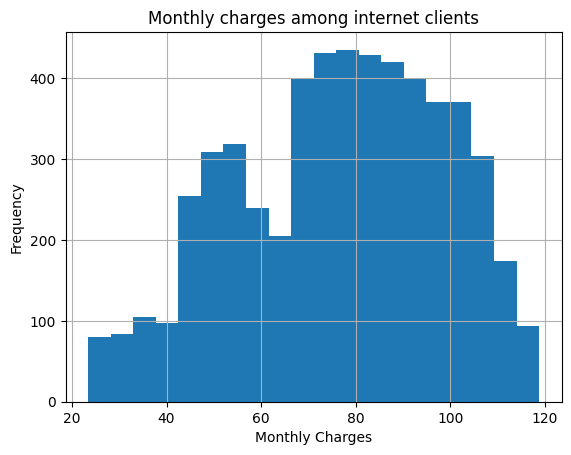

In [53]:
internet_users['monthlycharges'].hist(bins=20)
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Monthly charges among internet clients')
plt.show()

Se pueden identificar dos puntos destacados en el gráfico: uno alrededor de 50 y otro alrededor de 80. La distribución muestra un sesgo hacia la derecha.

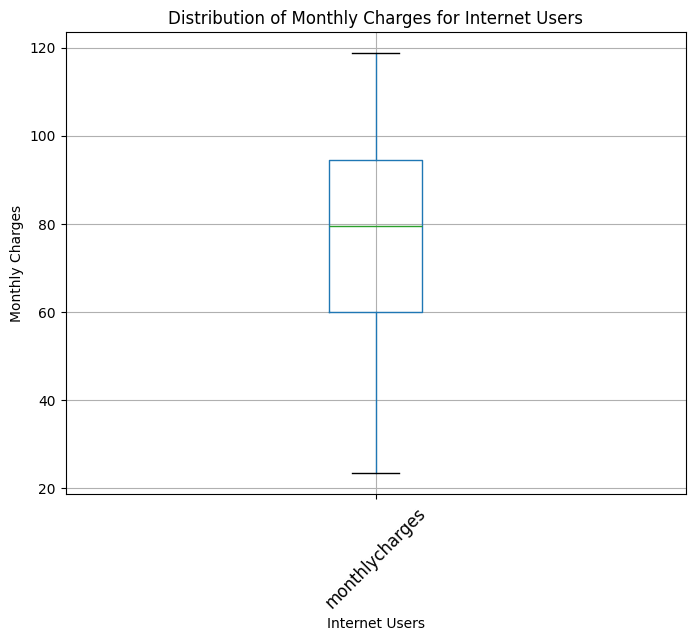

In [54]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

internet_users.boxplot(column='monthlycharges', ax=ax)
ax.set_xlabel('Internet Users')
ax.set_ylabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges for Internet Users')
plt.xticks(rotation=45, fontsize=12)

plt.show()


In [55]:
internet_users['monthlycharges'].describe()

count    5517.000000
mean       76.844254
std        21.924661
min        23.450000
25%        59.950000
50%        79.450000
75%        94.450000
max       118.750000
Name: monthlycharges, dtype: float64

Los usuarios de Internet suelen cobrar entre unos 60 (percentil 25) y unos 95 (percentil 75) mensuales. Desglosemos ahora la distribución por churn

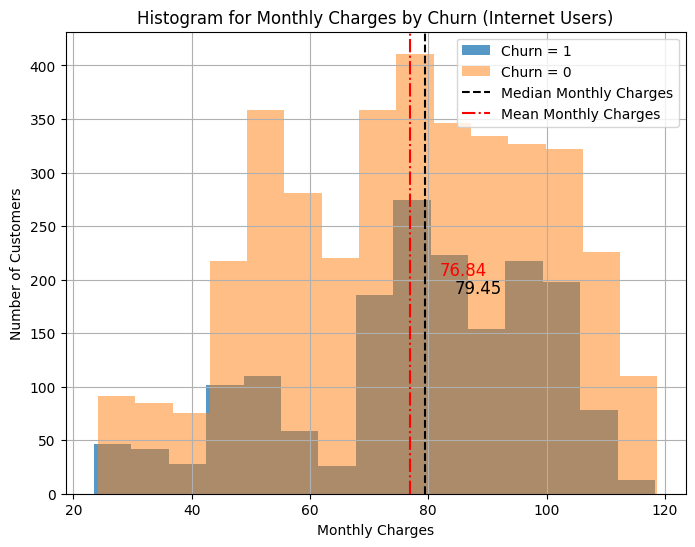

In [56]:
# Definir parámetros de gráfico
fig, ax = plt.subplots(figsize=(8, 6))

internet_users[internet_users['churn']==1]['monthlycharges'].hist(bins=15, alpha=0.75, label='Churn = 1', ax=ax)
internet_users[internet_users['churn']==0]['monthlycharges'].hist(bins=15, alpha=0.5, label='Churn = 0', ax=ax)

ax.axvline(x=internet_users['monthlycharges'].median(), color='k', linestyle='--', label='Median Monthly Charges')
ax.axvline(x=internet_users['monthlycharges'].mean(), color='r', linestyle='-.', label='Mean Monthly Charges')
ax.annotate('{:.2f}'.format(internet_users['monthlycharges'].median()), xy=(internet_users['monthlycharges'].median()+5, 200),
            fontsize=12, color='k', ha='left', va='top')
ax.annotate('{:.2f}'.format(internet_users['monthlycharges'].mean()), xy=(internet_users['monthlycharges'].mean()+5, 200),
            fontsize=12, color='r', ha='left', va='bottom')

# Etiquetas y título
ax.set_xlabel('Monthly Charges')
ax.set_ylabel('Number of Customers')
ax.set_title('Histogram for Monthly Charges by Churn (Internet Users)')
plt.legend(loc='upper right')

plt.show()

Las distribuciones son bastante parecidas, aunque la distribución de aquellos que se fueron es considerablemente menor.

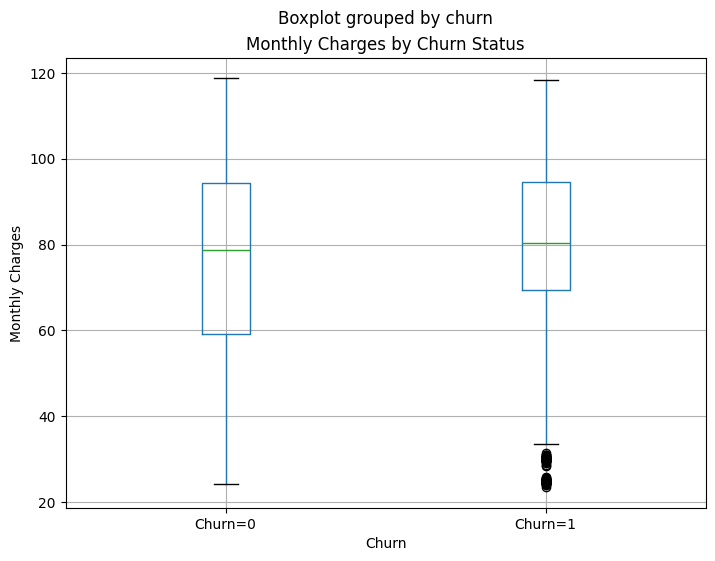

In [57]:
# Definir parámetros de gráfico
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
internet_users.boxplot(column='monthlycharges', by='churn', vert=True, ax=ax)
ax.set_xlabel('Churn')
ax.set_ylabel('Monthly Charges')
ax.set_title('Monthly Charges by Churn Status')
plt.xticks([1, 2], ['Churn=0', 'Churn=1'])
plt.show()

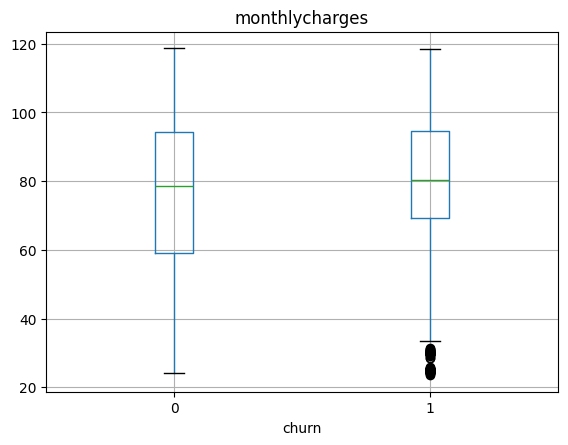

In [58]:
internet_users.boxplot(column='monthlycharges', by='churn')
plt.suptitle('')
plt.show()

Aquellos que cancelaron su servicio tuvieron cuotas mensuales más elevadas en comparación con aquellos que decidieron permanecer.

In [59]:
print('Monthly Charge distribution for those who left', internet_users[internet_users['churn']==1]['monthlycharges'].describe())

Monthly Charge distribution for those who left count    1756.000000
mean       77.920985
std        21.144147
min        23.450000
25%        69.350000
50%        80.450000
75%        94.650000
max       118.350000
Name: monthlycharges, dtype: float64


In [60]:
print('Monthly Charge distribution for those who stayed', internet_users[internet_users['churn']==0]['monthlycharges'].describe())

Monthly Charge distribution for those who stayed count    3761.000000
mean       76.341532
std        22.264652
min        24.150000
25%        59.100000
50%        78.650000
75%        94.300000
max       118.750000
Name: monthlycharges, dtype: float64


Las personas que abandonaron generalmente abonaban cantidades que oscilaban entre el 69% (percentil 25) y el 95% (percentil 75). Por otro lado, aquellos que decidieron quedarse pagaban montos que se situaban entre el 59% (percentil 25) y el 94% (percentil 75)

In [61]:
# Separar los datos en dos grupos basados en "churn" (0: no cancelado, 1: cancelado)
data_churn_0 = internet_users[internet_users['churn'] == 0]['monthlycharges']
data_churn_1 = internet_users[internet_users['churn'] == 1]['monthlycharges']

In [62]:
# Realizar la prueba t de Student
t_statistic, p_value = ttest_ind(data_churn_0, data_churn_1)

# Imprimir el resultado
print("Prueba t de Student - Estadístico t:", t_statistic)
print("Prueba t de Student - Valor p:", p_value)

Prueba t de Student - Estadístico t: -2.493686020952681
Prueba t de Student - Valor p: 0.012671504826975887


- Estadístico t: El valor del estadístico t es -2.493686020952681. Nuevamente, el signo negativo no es relevante para evaluar la magnitud de la diferencia entre las medias, solo indica en qué dirección se inclina la diferencia.

- Valor p: El valor p es 0.012671504826975887. Al igual que en el caso anterior, el valor p representa la probabilidad de obtener el estadístico t observado asumiendo que la hipótesis nula es cierta. En este caso, el valor p es mayor que 0.05 (nivel de significancia comúnmente utilizado), pero menor que 0.05, lo que sugiere que la probabilidad de que la diferencia en las medias sea debida al azar es del 1.27%, es decir, hay un 1.27% de probabilidad de obtener esta diferencia si la hipótesis nula fuera cierta.

- El valor p obtenido (0.012671504826975887) es menor que el nivel de significancia comúnmente utilizado (por ejemplo, 0.05), lo que indica que hay una diferencia estadísticamente significativa en la duración promedio de la estadía entre los grupos de clientes que cancelan y los que no cancelan.

En resumen, tanto para los usuarios de Internet como para los usuarios de teléfono, aquellos que optaron por dejar de utilizar el servicio en su mayoría pagaban una cantidad mensual más elevada

Plan de trabajo
-

Después de completar la extracción y preprocesamiento de datos, así como el análisis exploratorio de datos (EDA), se elabora un plan de trabajo para la siguiente fase del proyecto. En esta etapa, se llevará a cabo la creación de un modelo de aprendizaje automático con el objetivo de predecir la pérdida de clientes de la empresa de telecomunicaciones "Interconnect".

Una vez que tenemos claro nuestro objetivo, que es desarrollar un modelo para predecir qué clientes terminarán su contrato con la empresa, podemos abordar varias preguntas adicionales que nos ayudarán a prepararnos para el proceso de modelado, utilizaremos modelos como **"regresion lineal"**, **"Bosque aleatorio"**, **"arbol de decision"**, **"lightgbm"**, **"catboost"**.

Una hipotesis que podemos plantear pudiera ser si:
- La facturación electrónica está asociada con una menor tasa de cancelación. Se espera que los clientes que utilizan facturación electrónica tengan una probabilidad más baja de finalizar su contrato en comparación con aquellos que no utilizan este servicio.
- La utilización de servicios de internet por parte de los clientes está relacionada con su probabilidad de cancelación. Es posible que aquellos clientes que utilizan más servicios de internet tengan una menor probabilidad de cancelación, ya que pueden estar más satisfechos con los servicios ofrecidos.

Preguntas para el Lider del Proyecto
-

- ¿Es correcto afirmar que la variable objetivo puede ser una columna generada a partir de la variable "end_date", donde se utiliza el valor "True" para los clientes que han dejado la empresa y "False" para aquellos que siguen siendo clientes activos?
- ¿Cuántos modelos de entrenamiento se requieren para realizar una exhaustiva exploración y determinar el mejor modelo a elegir?
- ¿Es recomendable modularizar las funciones que crearemos dentro del proyecto en un script con formato .py o es preferible mantenerlas dentro del mismo notebook como de costumbre?
- ¿Es aconsejable emplear redes neuronales para este proyecto o es suficiente con el uso de algoritmos de aprendizaje automático convencionales?
- ¿Es imprescindible seleccionar las características más adecuadas para nuestro modelo?

# Entrenamiento del Modelo<a name='step5'></a>

Podemos eliminar la columna customerID, ya que no será de utilidad.

In [63]:
data_third = data_third.drop(['customerid', 'begindate', 'enddate'], axis=1)

## Segmentaremos nuestros datos en conjuntos de entrenamiento y de prueba.

- Vamos a utilizar tres tipos diferentes de datos. 
- El primero será codificado de forma ordinal y escalado,
- El segundo será one-Hot Encoding y escalado,
- El tercero será escalado sin codificación. 
- Cada uno de estos conjuntos será aumentado mediante un proceso de sobremuestreo para abordar el desequilibrio de clases existente.

- **A continuación, crearemos la función que utilizaremos para llevar a cabo el sobremuestreo.**

In [64]:
#Sobremuestreo
def upsample(features, target, repeat):

    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_ups = pd.concat([features_zeros] + [features_ones] * repeat)
    target_ups = pd.concat([target_zeros] + [target_ones] * repeat)
    features_ups, target_ups = shuffle(features_ups, target_ups, random_state=12345)
    
    return features_ups, target_ups

- **Ordinal Encoding and Scaling**

In [65]:
data_model=data_third.copy()
cat_feat = data_model.columns[data_model.dtypes=='category']
encoder=OrdinalEncoder()
data_model[cat_feat]=encoder.fit_transform(data_model[cat_feat])

In [66]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   seniorcitizen     7043 non-null   float64
 2   partner           7043 non-null   float64
 3   dependents        7043 non-null   float64
 4   type              7043 non-null   float64
 5   paperlessbilling  7043 non-null   float64
 6   paymentmethod     7043 non-null   float64
 7   monthlycharges    7043 non-null   float64
 8   totalcharges      7043 non-null   float64
 9   churn             7043 non-null   int32  
 10  days              7043 non-null   int64  
 11  multiplelines     7043 non-null   float64
 12  internetservice   7043 non-null   float64
 13  onlinesecurity    7043 non-null   float64
 14  onlinebackup      7043 non-null   float64
 15  deviceprotection  7043 non-null   float64
 16  techsupport       7043 non-null   float64


In [67]:
#las características serán todas las columnas excepto la columna churn
features=data_model.drop('churn', axis=1)
#El objetivo será la columna de churn
target=data_model['churn']
features_train, features_test, target_train, target_test=train_test_split(features, target, test_size=0.25, random_state=12345)

In [68]:
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(5282, 19)
(5282,)
(1761, 19)
(1761,)


In [69]:
#desbalance de clases
target_train.value_counts(normalize=True)

churn
0    0.735895
1    0.264105
Name: proportion, dtype: float64

In [70]:
#Aplica la función "upsample" al conjunto de características de entrenamiento y al objetivo mediante una iteración para obtener una muestra representativa.
feat_ups, targ_ups = upsample(features_train, target_train, 3)

print(feat_ups.shape, targ_ups.shape)

(8072, 19) (8072,)


In [71]:
#Escalado de columnas numéricas

numeric = ['monthlycharges', 'totalcharges', 'days']

scaler = StandardScaler()
scaler.fit(feat_ups[numeric])
feat_ups[numeric] = scaler.transform(feat_ups[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
feat_ups.head()

,gender,seniorcitizen,partner,dependents,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,days,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,month_of_stay
498,0.0,1.0,0.0,0.0,0.0,0.0,2.0,-1.384093,-0.875016,-0.943089,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5
6152,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.870217,-0.213243,-0.482848,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,16
2391,1.0,0.0,0.0,0.0,0.0,1.0,2.0,-0.311773,-0.734854,-0.816694,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8
1863,1.0,0.0,1.0,0.0,1.0,0.0,3.0,-1.500725,-0.856690,-0.900499,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,6
6596,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.454171,1.618817,1.524353,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,64


- **One-Hot codificado y Escalado**

In [72]:
data_ohe=pd.get_dummies(data_third, drop_first=True)
data_ohe.head()

,monthlycharges,totalcharges,churn,days,month_of_stay,gender_Male,seniorcitizen_1,partner_Yes,dependents_Yes,type_One year,...,paymentmethod_Mailed check,multiplelines_True,internetservice_Fiber optic,internetservice_No,onlinesecurity_True,onlinebackup_True,deviceprotection_True,techsupport_True,streamingtv_True,streamingmovies_True
0,29.85,29.85,0,31,1,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,56.95,1889.50,0,1036,34,True,False,False,False,True,...,True,False,False,False,True,False,True,False,False,False
2,53.85,108.15,1,61,2,True,False,False,False,False,...,True,False,False,False,True,True,False,False,False,False
3,42.30,1840.75,0,1371,45,True,False,False,False,True,...,False,False,False,False,True,False,True,True,False,False
4,70.70,151.65,1,61,2,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [73]:
#las características serán todas las columnas excepto la columna churn
feat=data_ohe.drop('churn', axis=1)
#El objetivo será la columna de churn
target=data_ohe['churn']
f_train, f_test, t_train, t_test=train_test_split(feat, target, test_size=0.25, random_state=12345)
print(f_train.shape)
print(t_train.shape)
print(f_test.shape)
print(t_test.shape)

(5282, 23)
(5282,)
(1761, 23)
(1761,)


In [74]:
print(f_train.shape)
print(t_train.shape)
print(f_test.shape)
print(t_test.shape)

(5282, 23)
(5282,)
(1761, 23)
(1761,)


In [75]:
f_ohe, t_ohe = upsample(f_train, t_train, 3)
print(f_ohe.shape, t_ohe.shape)

(8072, 23) (8072,)


- **crearemos una lista con los nombres numéricos de las columnas**

In [76]:
numeric = ['monthlycharges', 'totalcharges', 'days']

scaler = StandardScaler()
scaler.fit(f_ohe[numeric])
f_ohe[numeric] = scaler.transform(f_ohe[numeric])
f_test[numeric] = scaler.transform(f_test[numeric])
f_ohe.head()

,monthlycharges,totalcharges,days,month_of_stay,gender_Male,seniorcitizen_1,partner_Yes,dependents_Yes,type_One year,type_Two year,...,paymentmethod_Mailed check,multiplelines_True,internetservice_Fiber optic,internetservice_No,onlinesecurity_True,onlinebackup_True,deviceprotection_True,techsupport_True,streamingtv_True,streamingmovies_True
498,-1.384093,-0.875016,-0.943089,5,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6152,0.870217,-0.213243,-0.482848,16,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,False,True
2391,-0.311773,-0.734854,-0.816694,8,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1863,-1.500725,-0.856690,-0.900499,6,True,False,True,False,True,False,...,True,True,False,True,False,False,False,False,False,False
6596,0.454171,1.618817,1.524353,64,True,False,False,False,True,False,...,False,True,False,False,True,True,True,True,True,False


- **Scaling without Encoding (CatBoost and LGBM only)**

In [77]:
no_enc=data_third.copy()
#las características serán todas las columnas excepto la columna churn
feat=no_enc.drop('churn', axis=1)
#El objetivo será la columna de churn
target=no_enc['churn']
ft_train, ft_test, tr_train, tr_test=train_test_split(feat, target, test_size=0.25, random_state=12345)

In [78]:
print(ft_train.shape)
print(tr_train.shape)
print(ft_test.shape)
print(tr_test.shape)

(5282, 19)
(5282,)
(1761, 19)
(1761,)


In [79]:
f_ne, t_ne = upsample(ft_train, tr_train, 3)
print(f_ne.shape, t_ne.shape)

(8072, 19) (8072,)


In [80]:
#crea una lista con los nombres numéricos de las columnas
numeric = ['monthlycharges', 'totalcharges', 'days']

scaler = StandardScaler()
scaler.fit(f_ne[numeric])
f_ne[numeric] = scaler.transform(f_ne[numeric])
ft_test[numeric] = scaler.transform(ft_test[numeric])
f_ne.head()

,gender,seniorcitizen,partner,dependents,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,days,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,month_of_stay
498,Female,1,No,No,Month-to-month,No,Electronic check,-1.384093,-0.875016,-0.943089,False,DSL,False,True,False,False,False,False,5
6152,Female,0,No,No,Month-to-month,Yes,Credit card (automatic),0.870217,-0.213243,-0.482848,False,Fiber optic,False,True,True,False,False,True,16
2391,Male,0,No,No,Month-to-month,Yes,Electronic check,-0.311773,-0.734854,-0.816694,True,DSL,False,False,False,False,True,False,8
1863,Male,0,Yes,No,One year,No,Mailed check,-1.500725,-0.856690,-0.900499,True,No,False,False,False,False,False,False,6
6596,Male,0,No,No,One year,No,Electronic check,0.454171,1.618817,1.524353,True,DSL,True,True,True,True,True,False,64


# Models<a name='step6'></a>

## Regresión Logistica

In [81]:
#Se realizara una validación cruzada de regresión logística en un conjunto de datos que ha sido codificado de manera ordinal y escalado.
lr = LogisticRegression(solver='liblinear')
lr_score=cross_val_score(lr, feat_ups, targ_ups, scoring='roc_auc', cv=5)
print(lr_score.mean())

0.8518761911663478


In [82]:
#Se lleva a cabo el entrenamiento de un modelo de regresión logística en un conjunto de datos que ha sido codificado y escalado utilizando la técnica One-Hot.
lr = LogisticRegression(solver='liblinear')
lr_score=cross_val_score(lr, f_ohe, t_ohe, scoring='roc_auc', cv=5)
print(lr_score.mean())

0.8590946673872291


## Random Forest

-Realizamos una validación cruzada del algoritmo de Bosques Aleatorios utilizando datos que fueron codificados de forma ordinal y escalados.

In [83]:
#validacion cruzada de random forest codificacion ordinal and escalado
for depth in range(21, 26):
    rf=RandomForestClassifier(n_estimators=40, max_depth=depth, random_state=12345)
    rf_score=cross_val_score(rf, feat_ups, targ_ups, scoring='roc_auc', cv=5)
    print('Max_depth', depth, 'score:', rf_score.mean())

Max_depth 21 score: 0.9843673099056354
Max_depth 22 score: 0.9838481727831315
Max_depth 23 score: 0.984410636850032
Max_depth 24 score: 0.9836295776741363
Max_depth 25 score: 0.983969949004363


- Validación cruzada de bosques aleatorios con datos de codificación One-Hot y escalado**.

In [84]:
#validacion cruzada de random forest One-Hot and escalado
for depth in range(21, 26):
    rf=RandomForestClassifier(n_estimators=40, max_depth=depth, random_state=12345)
    rf_score=cross_val_score(rf, f_ohe, t_ohe, scoring='roc_auc', cv=5)
    print('Max_depth', depth, 'score:', rf_score.mean())

Max_depth 21 score: 0.9845913671797522
Max_depth 22 score: 0.984895712964652
Max_depth 23 score: 0.9851927935185252
Max_depth 24 score: 0.9844635449660741
Max_depth 25 score: 0.9841200455941866


## CatBoost

validacion cruzada "**catboost**" utilizando un conjunto de dato que ha sido codificado de manera ordinal y escalado

In [85]:
#Se realiza una validación cruzada utilizando el algoritmo CatBoost en un conjunto de datos que ha sido codificado de manera ordinal y escalado.
cb=CatBoostClassifier(loss_function='Logloss',
                      learning_rate= 0.1,
                      random_seed=12345)
cb_score=cross_val_score(cb, feat_ups, targ_ups, scoring='roc_auc', cv=5)

0:	learn: 0.6470297	total: 149ms	remaining: 2m 28s
1:	learn: 0.6109528	total: 155ms	remaining: 1m 17s
2:	learn: 0.5851012	total: 162ms	remaining: 53.7s
3:	learn: 0.5587602	total: 166ms	remaining: 41.4s
4:	learn: 0.5387411	total: 171ms	remaining: 34.1s
5:	learn: 0.5240266	total: 176ms	remaining: 29.2s
6:	learn: 0.5139314	total: 182ms	remaining: 25.8s
7:	learn: 0.5046352	total: 187ms	remaining: 23.2s
8:	learn: 0.4945870	total: 191ms	remaining: 21s
9:	learn: 0.4872775	total: 194ms	remaining: 19.2s
10:	learn: 0.4789651	total: 197ms	remaining: 17.7s
11:	learn: 0.4727029	total: 200ms	remaining: 16.5s
12:	learn: 0.4678213	total: 206ms	remaining: 15.6s
13:	learn: 0.4639336	total: 213ms	remaining: 15s
14:	learn: 0.4597600	total: 220ms	remaining: 14.5s
15:	learn: 0.4562916	total: 227ms	remaining: 13.9s
16:	learn: 0.4533916	total: 232ms	remaining: 13.4s
17:	learn: 0.4493890	total: 237ms	remaining: 12.9s
18:	learn: 0.4466041	total: 240ms	remaining: 12.4s
19:	learn: 0.4443513	total: 243ms	remaining

In [86]:
print(cb_score.mean())

0.9815584719805633


**Se realizó una validación cruzada del algoritmo CatBoost utilizando datos que fueron escalados no codificados**

In [87]:
# Validacion Cruzada del algoritmo Catboost con un conjunto de datos que fue escalado sin codificacion
cat_feat=['multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
'techsupport', 'streamingtv', 'streamingmovies', 'gender', 'seniorcitizen', 'partner',
'dependents', 'type', 'paperlessbilling', 'paymentmethod']
cb=CatBoostClassifier(loss_function='Logloss',
                      learning_rate= 0.1,
                      random_seed=12345)
cb.fit(f_ne, t_ne, cat_features=cat_feat, verbose=False, plot=False)
cb_score=cross_val_score(cb, feat_ups, targ_ups, scoring='roc_auc', cv=5)

0:	learn: 0.6470297	total: 2.43ms	remaining: 2.43s
1:	learn: 0.6109528	total: 4.63ms	remaining: 2.31s
2:	learn: 0.5851012	total: 6.79ms	remaining: 2.26s
3:	learn: 0.5587602	total: 9.36ms	remaining: 2.33s
4:	learn: 0.5387411	total: 11.5ms	remaining: 2.29s
5:	learn: 0.5240266	total: 13.7ms	remaining: 2.27s
6:	learn: 0.5139314	total: 15.9ms	remaining: 2.25s
7:	learn: 0.5046352	total: 18.3ms	remaining: 2.27s
8:	learn: 0.4945870	total: 20.7ms	remaining: 2.28s
9:	learn: 0.4872775	total: 23.2ms	remaining: 2.3s
10:	learn: 0.4789651	total: 26ms	remaining: 2.34s
11:	learn: 0.4727029	total: 29.1ms	remaining: 2.4s
12:	learn: 0.4678213	total: 32.2ms	remaining: 2.44s
13:	learn: 0.4639336	total: 35.1ms	remaining: 2.47s
14:	learn: 0.4597600	total: 38ms	remaining: 2.5s
15:	learn: 0.4562916	total: 40.7ms	remaining: 2.5s
16:	learn: 0.4533916	total: 42.8ms	remaining: 2.47s
17:	learn: 0.4493890	total: 45.2ms	remaining: 2.46s
18:	learn: 0.4466041	total: 48.1ms	remaining: 2.48s
19:	learn: 0.4443513	total: 51

In [88]:
print(cb_score.mean())

0.9815584719805633


## LightGBM Algorithm

- validación cruzada del modelo LGBM utilizando datos que fueron codificados de forma ordinal y escalados.

In [89]:
#Cross-validating LGBM on data with Ordinal Encoding and scaling
lgbm=LGBMClassifier(objective='binary',
                    learning_rate= 0.7,
                    random_state=12345)
lgbm_score=cross_val_score(lgbm, feat_ups, targ_ups, scoring='roc_auc', cv=5)
print(lgbm_score.mean())

[LightGBM] [Info] Number of positive: 3348, number of negative: 3109
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002839 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 6457, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.518507 -> initscore=0.074062
[LightGBM] [Info] Start training from score 0.074062
[LightGBM] [Info] Number of positive: 3348, number of negative: 3109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 770
[LightGBM] [Info] Number of data points in the train set: 6457, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.518507 -> initscore=0.074062
[LightGBM] [I

- Validacion cruzada del modelo LightGBM utilizando datos que fueron escalados pero no codificados

In [90]:
#Cross-validating LGBM on data that was scaled but not encoded
lgbm=LGBMClassifier(objective='binary',
                    learning_rate= 0.6,
                    random_state=12345)
lgbm_score=cross_val_score(lgbm, f_ne, t_ne, scoring='roc_auc', cv=5)
print(lgbm_score.mean())

[LightGBM] [Info] Number of positive: 3348, number of negative: 3109
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000714 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784
[LightGBM] [Info] Number of data points in the train set: 6457, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.518507 -> initscore=0.074062
[LightGBM] [Info] Start training from score 0.074062
[LightGBM] [Info] Number of positive: 3348, number of negative: 3109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 6457, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.518507 -> initscore=0.074062
[LightGBM] [I

# Prueba Final<a name='step7'></a>

- Entre todos nuestros modelos, el que obtuvo el mejor rendimiento según la validación cruzada fue el modelo **"CatBoost"**, con una impresionante puntuación del **"90.8%"**. A continuación, procederemos a evaluar este modelo en el conjunto de prueba. 
- Utilizaremos el CatBoost con su codificador incorporado para realizar esta prueba.

In [91]:
#Training CatBoost on data that was scaled but not encoded
cat_feat=['multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
'techsupport', 'streamingtv', 'streamingmovies', 'gender', 'seniorcitizen', 'partner',
'dependents', 'type', 'paperlessbilling', 'paymentmethod']
cb=CatBoostClassifier(loss_function='Logloss',
                      learning_rate= 0.1,
                      random_seed=12345)
cb.fit(f_ne, t_ne, cat_features=cat_feat, verbose=False, plot=False)
pred=cb.predict(ft_test)
acc=accuracy_score(tr_test, pred)
probab=cb.predict_proba(ft_test)
auc=roc_auc_score(tr_test, probab[:,1])
print('AUC-ROC =', auc)
print('Accuracy =', acc)

AUC-ROC = 0.9068599005307867
Accuracy = 0.8517887563884157


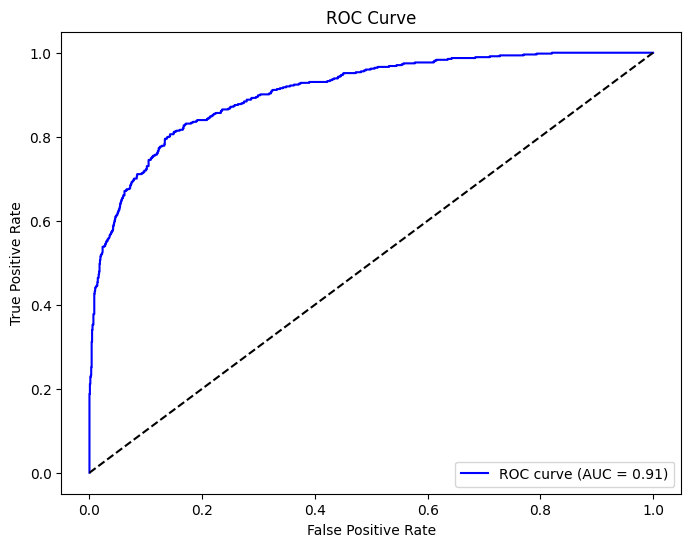

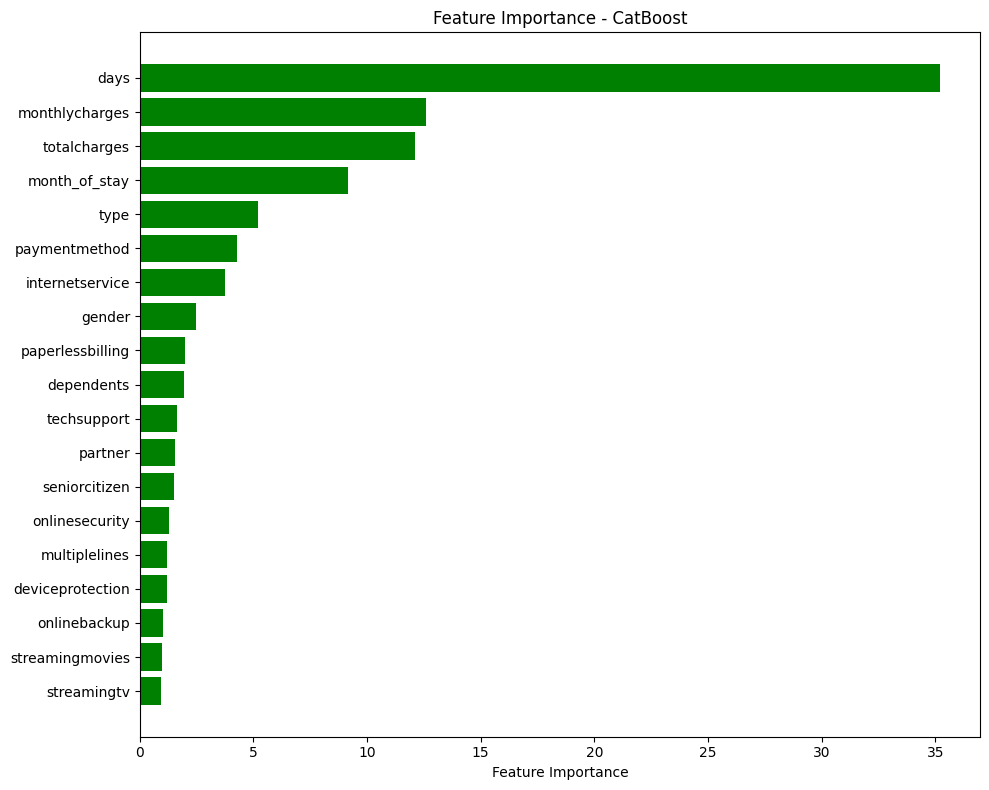

In [92]:
# Graficar la curva ROC
fpr, tpr, thresholds = roc_curve(tr_test, probab[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc), color='b')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Graficar la importancia de características
feature_importance = cb.get_feature_importance()
feature_names = cb.feature_names_
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx], color='g')
plt.yticks(range(len(feature_importance)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance - CatBoost')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


- "AUC-ROC = 0.9068: Esto es una medida de qué tan bien está funcionando mi modelo para clasificar correctamente las instancias en mi conjunto de datos. El valor de AUC-ROC es cercano a 1.0, lo cual es genial, porque eso significa que mi modelo tiene un poder de discriminación muy bueno. En otras palabras, mi modelo es capaz de distinguir muy bien entre los casos que pertenecen a la clase positiva y los que pertenecen a la clase negativa. Eso es una muy buena señal y me da confianza en la calidad de las predicciones que hace mi modelo."

- "Accuracy = 0.8518: Esta es una medida que muestra qué tan preciso es mi modelo en general. Un valor de 0.8518 significa que el 85.18% de las veces, mi modelo está haciendo predicciones correctas. ¡Eso es bastante bueno! Me alegra ver que mi modelo tiene una precisión alta, lo cual significa que está acertando en la mayoría de las predicciones que hace."

# Conclusión<a name='step8'></a>

- Tras un análisis de los datos, encontramos que los clientes que abandonaron el servicio solían tener pagos mensuales más elevados. Además, notamos que la mayoría de los clientes que se marcharon optaban por pagar electrónicamente, lo que sugiere la necesidad de revisar ese sistema. Para nuestro estudio, entrenamos varios modelos, incluyendo **"Logistic Regression"**, **"Random Forest"**, **"CatBoost"** y **"LightGBM"**. 
- Después de realizar la validación cruzada, observamos que el modelo **"CatBoostClassifier obtuvo la puntuación más alta (0,98)"** en el conjunto de entrenamiento. Procedimos a evaluarlo en el conjunto de pruebas y encontramos una puntuación **AUC-ROC de aproximadamente 0,91 y una precisión cercana al 85%**.

# Informe de la Solución

### ¿Qué partes del plan se llevaron a cabo y cuáles no fueron realizadas (explica la razón)?
- Todas las etapas del plan fueron ejecutadas sin excepción.

### ¿Qué obstáculos enfrentaste y cómo los superaste?
- No experimenté dificultades significativas; en cambio, encontré algunos errores señalados por el revisor del código durante la etapa de procesamiento de datos. Cada corrección la realicé en línea con las discusiones y aclaraciones proporcionadas por mi líder de proyecto, y también llevé a cabo investigaciones adicionales por mi cuenta. Puedo decir que este proyecto me brindó una oportunidad para conocer más aunque sea un poco de la vida laboral de un cientifico de datos, así como las dificultades y problemas que podemos enfrentar en el ámbito laboral.

### ¿Cuáles fueron algunos de los pasos fundamentales para abordar la tarea?

- Establecer una organización clara y definir el objetivo del desarrollo de mi proyecto.
- En cuanto a la organización, dividí el proyecto en diversas etapas:
  - Informacion General
  - Extracción de datos
  - Preprocesamiento de datos
  - Análisis exploratorio de datos (EDA)
  - Procesamiento de datos
  - Entrenamiento de modelos
  - Evaluacion de los modelos
  - Prueba Final del mejor modelo
  - Conclusión
- En cada etapa, documenté detalladamente el proceso paso a paso y trate de proporcionar justificación para mis análisis y resultados.
- Mantuve un código limpio y estructurado mediante la creación de funciones, lo que me ayudó a optimizar mi código de manera más eficiente.

### #### - ¿Cuál es el modelo que seleccionaste finalmente y qué nivel de desempeño alcanzó?
El modelo que seleccioné como el mejor fue el CatBoost de Machine Learning. Después de ajustar cuidadosamente los hiperparámetros, logramos obtener un nivel de calidad excepcional para nuestro modelo. La métrica AUC-ROC alcanzó aproximadamente valor de 0.91 en los datos de prueba, lo que evidencia su excelente rendimiento en la tarea. Además, el modelo obtuvo una alta precisión (Accuracy) de 0.8518, lo que demuestra su capacidad para realizar predicciones precisas. Estos resultados sólidos y altamente prometedores hacen del CatBoost la opción ideal para abordar exitosamente esta tarea específica de machine learning.
